<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/Copia_de_SNS_2_1_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo 5:** Escalamiento de datos
Carlos JAvier Delgado Bolaños
---



In [ ]:
import numpy as np

x=[1,2,3,4,5,6,7,8,9,10]
mediaX=np.mean(x)
print("Media", mediaX)
np.median(x)
print("Mediana", mediaX)
# Calcular la desviación estándar muestral
desviacion_estandar_muestral = np.std(x, ddof=1)

# Calcular la varianza muestral
varianza_muestral = np.var(x, ddof=1)

# Calcular el rango
rango = np.max(x) - np.min(x)

print("Desviación estándar muestral", desviacion_estandar_muestral)
print("Varianza muestral", varianza_muestral)
print("Rango", rango)

Media 5.5
Mediana 5.5
Desviación estándar muestral 3.0276503540974917
Varianza muestral 9.166666666666666
Rango 9


In [ ]:
import pandas as pd
df_x=pd.DataFrame(x)

print(df_x.describe())
print(df_x)

              0
count  10.00000
mean    5.50000
std     3.02765
min     1.00000
25%     3.25000
50%     5.50000
75%     7.75000
max    10.00000
    0
0   1
1   2
2   3
3   4
4   5
5   6
6   7
7   8
8   9
9  10


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
x_pandas=pd.Series([1,2,3,4,5,6,7,8,9,10])
numeric_cols=Data.select_dtypes(include=['float64', 'int']).columns.to_list()
Data = pd.DataFrame(x_pandas, columns=["numeros"])
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')


Data_prep_RR = preprocessor_RR.fit_transform(Data)

mediaX1=np.mean(Data_prep_RR)
print("Media", mediaX1)
mediaX2=np.median(Data_prep_RR)
print("Mediana", mediaX2)



Media 0.5
Mediana 0.5


In [ ]:
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')


Data_prep_RR = preprocessor_RR.fit_transform(Data)
print(Data_prep_RR)

[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


In [ ]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))
x=[1,2,3,4,5,6,7,8,9,10]
mediaX=np.mean(x)
print(mediaX)
# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

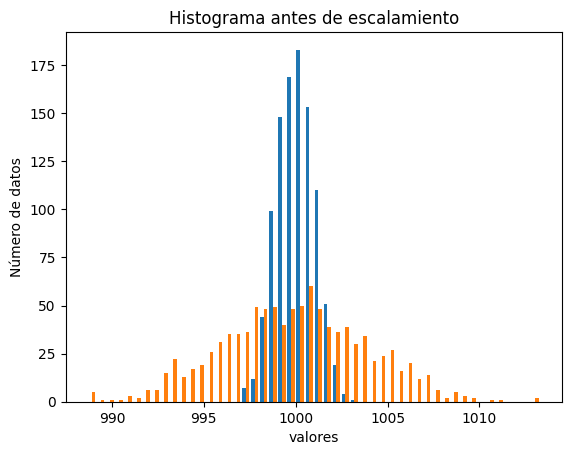

In [ ]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


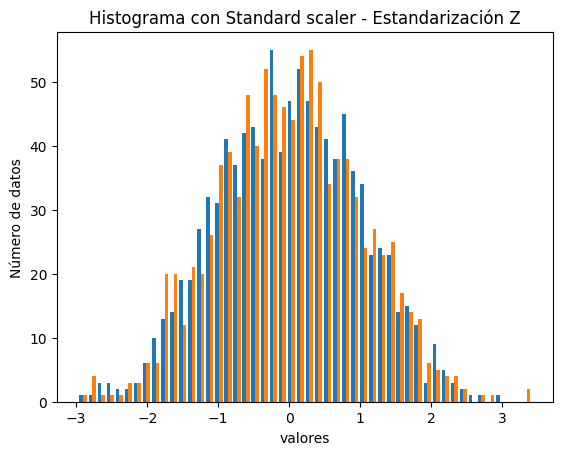

In [ ]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [ ]:
Data_prep_SS.std()


1.0000000000000002

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



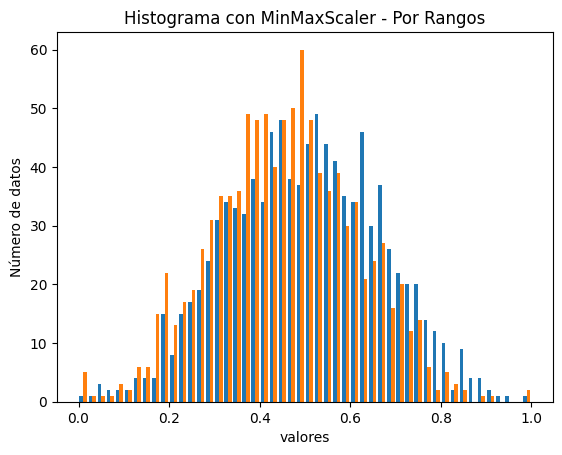

In [ ]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [ ]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [ ]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0